# Final Project: Predictive Modeling of California Wildfires Using Weather Data#

**Members:** <br>
*Kunming Song <br>
Mhariadora Bocalbos <br>
Renzhu Li*

## Introduction: ##

Although there is not really a specific trend about US wildfires in recent years, that is, whether it is increasing or decreasing in number, this incident has been costing the US government money not just because of the losses but also the cost of mitigating fires. In fact, for the past 10 years alone, losses from wildfires added up to \\$5.1 billion. In California alone, the total potential exposure to wildfire damage for the high and very high risk categories amounts to a total of $105.45 billion dollars which is about 44% of the total amount for 13 states such as Washington, Texas, Oklahoma, Colorado, Montana, Nevada, to mention a few. In 2017, California also ranked as the top state to be most wildfire prone based on number of households at risk but ranked fourth in terms of percentage. Last year, California ranked second as having the highest number of fires. California, however, ranked first in terms of the number of acres burned.

Wildfires are caused by different factors. According to research, 90% are caused by humans such as unattended campfires, burning of debris, downed power lines, irresponsibly discarding cigarettes, and even intentional acts of arson. The remaining 10% is caused by some environmental factors like lightning or lava. 

Because of the information discussed above, this study will focus on the wildfires that happened in California and build a model that will predict the size of the area burned during wildfires based on historical weather information.

## Research Questions and Significance of the Study: ##

Using historical forest fires data in California and weather data during the start of the fire, the main question that we would like to answer for this research is to create a model which can predict the area burned during forest fires. Prior to this, we will be conducting some exploratory data analysis to analyze trends (e.g., number of fires that occurred in a specific season, year, and month and also the area burned in a specific season, year and month).

As mentioned above, losses brought about by forest fires are costly. Thus, mitigating the impact of forest fires will be helpful to minimize not just the cost of the losses that can be incurred but also to minimize injuries or sometimes, even saving lives of people that can be involved in this type of incident. We believe that by being able to create a model to predict the area burned using the parameters involved, we will be able to optimize (that is, minimize) the days involved in stopping these forest fires. Since firemen will know that impact will be severe, the firemen will know ahead of time the number of people they need to deploy ahead of time and they can plan ahead as to the equipments/vehicles they need to stop the fire as fast as possible. By doing these, the damage brought about by forest fires will be minimized.

## Data Source and Acquisition: ##

### Data Sources: ###
The research work and data that will be gathered in this study is based on this paper http://www3.dsi.uminho.pt/pcortez/fires.pdf and this dataset http://archive.ics.uci.edu/ml/datasets/Forest+Fires. This dataset lists forest fires in Portugal. However, for this research, we will be collecting our own data so we can be able to apply and build a model that would estimate the size of the fire using a dataset in California.

For this project, we will be gathering data using the following websites:
1. National Interagency Coordination Center (NICC) [link] https://www.nifc.gov/fireInfo/fireInfo_statistics.html: This website was used to gather historical wildfire annual summary report in the US. The files are in PDF version and the table that we are going to use only lists fires that are considered "significant". The definition of which is that the total burned area is equal or over 40,000 acres in size. 

2. Dark Sky API [link] (https://darksky.net/dev/account): This website was used to gather information about the weather based on the location and date that the fire happened. Before starting to gather data, a research was conducted since the original dataset (Portugal Forest Fires) used the Fire Weather Index (FWI) System in their study. This is one of the limitations of our current study. We were not able to calculate the different FWI such as Fine Fuel Moisture Code (FFMC), Duff Moisture Code (DMC), Drought Code (DC), and Initial Spread Index (ISI). However, weather data gathered used the information to calculate these indeces such as Air Temperature, Relative Humidity, Wind Speed, and Rainfall. Furthermore, research said that the weather readings should be taken at noon standard time. Therefore, this time information was used during the API call.

### Data Acquisition: ###

#### Part 1: Fire Dataset ####

Upon checking the PDF file annual reports of the fires in the US, our group decided to just use the files from 2005 - 2018 because the reports prior to year 2005, i.e., 2000 - 2004, does not have the table that we have identified as containing the useful information we need for this project. The target table that we used contains the following columns:

Name: The unique name used to identify the fire
GACC: Geographic Area Coordination Center where the incident was reported and handled
State: Name of the state where the fire occurred
Start Date: The date when the fire started
Contain or Last Report Date: The date when the fire is considered contained
Size: (in acres) The size of the burned area
Cause: The reason for the start of the fire
Estimated Cost: Cost of mitigating the fire

**Steps for Data Management and Collection:**
1. Download all annual report PDF files from the above website.
2. Save the PDF files in a folder in one of our local machines.
3. Look for the pages where the target table can be found.
4. Run code found below to read the PDF files and extract target table and save table as CSV files that will be merged as one CSV file and will be used for data analysis.

**Prerequisites for running the code:**
Since the researchers have no experience yet in reading PDF files in Python, we had to do some research on how we can extract the PDF file in Python. After some research, we found a fairly new library called Camelot that is able to read and extract PDF files into a CSV file [link] https://camelot-py.readthedocs.io/en/master/user/quickstart.html#read-the-pdf. To do this, there are some things that is needed to be installed. These are the camelot library, cv2 library, and install Ghostscript.

**Step 1: Read PDF file and extract to CSV file**

**Step 2: Combines all extracted CSV file in one CSV file**

#### Part 2: Weather Dataset ####

To be able to make requests through the Dark Sky API website, you need to first sign up and get your unique key. The url requests also requires the following information longitude and latitude (location where the fire happened) and time you are inquiring about. Since our historical fire does not have this information, we needed to research on the location of each California wildfire which is found to be 61 records from 2005 - 2018. After researching on the location information, a CSV file was created and this is used for each API requests. Found below is the code that was used to do this:

**Step 1: Read CSV file**

**Step 2: Loops through each record in the CSV file and makes an API call to get weather data**

### Data Preparation for Analysis: ###

There are two files collected that will be used for data analysis and modeling. One file contains all the significant fires that happened in the US between 2005 to 2018 and the other one contains weather data information for all the significant fires that happened in California from 2005 to 2018.

Exploratory Data Analysis (EDA) will be done in two parts. The first EDA will analyze the overall trend of wildfires in the US while the second EDA will only focus on the wildfires that happened in California.

#### Part 1: Cleaning up the dataset for all US wildfires ####

**Steps done to prepare first dataset for analysis:**
1. Import and read CSV file containing all records with US wildfires.
2. Drop additional index column created when CSV file was exported.
3. Clean "Name" column to remove whitespaces and special characters.
4. Remove commas (",") from numeric columns (such as Costs and Size) and change datatype to numeric.
5. Transform Start Date and Contain Date columns from string to Date Time to be able to do some calculations.
6. Calculate days between date fire started and contain date.
7. Extract month and year of when the fire started. Replace month columns to the names of the actual months.
8. Check if there are contain dates that are greater than date fire actually started do necessary steps to correct this.

In [1]:
import numpy as np
import pandas as pd

fire_df = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/combinedfire.csv')
fire_df.drop(columns = 'Unnamed: 0',inplace=True) #drops index column created during extract
fire_df.rename(columns={'Contain or Control Date': 'ControlDate', 
                        'Start Date': 'StartDate'},inplace=True) #renames columns to become shorter
fire_df.head()

,Name,GACC,State,StartDate,ControlDate,Size,Cause,Costs
0,Mooseheart,AK,AK,6/7/2018,7/5/2018,"53,643",L,"10,000"
1,Taylor Creek,NW,OR,7/15/2018,10/11/2018,"52,839",L,"24,077,000"
2,Perry,GB,NV,7/27/2018,8/6/2018,"51,400",U,"4,950,000"
3,Badger Hole,RM,CO,4/17/2018,4/22/2018,"50,671",H,"131,444"
4,Buzzard,SW,NM,5/22/2018,7/12/2018,"50,296",U,"15,100,000"


In [3]:
fire_df['Name']=fire_df['Name'].str.replace('\r\r','') #looks for '\r\r' between Name values and replaces string as space
fire_df['Name']=fire_df['Name'].str.replace('\n',' ') #looks for '\n' on Name values and replaces string as space
fire_df.head()

,Name,GACC,State,StartDate,ControlDate,Size,Cause,Costs
0,Mooseheart,AK,AK,6/7/2018,7/5/2018,"53,643",L,"10,000"
1,Taylor Creek,NW,OR,7/15/2018,10/11/2018,"52,839",L,"24,077,000"
2,Perry,GB,NV,7/27/2018,8/6/2018,"51,400",U,"4,950,000"
3,Badger Hole,RM,CO,4/17/2018,4/22/2018,"50,671",H,"131,444"
4,Buzzard,SW,NM,5/22/2018,7/12/2018,"50,296",U,"15,100,000"


In [4]:
fire_df['Size']=fire_df['Size'].str.replace(',','').astype(float) #removes commas from Size column and replaces it to space
fire_df.head()                                                    #then change datatype from string to float

,Name,GACC,State,StartDate,ControlDate,Size,Cause,Costs
0,Mooseheart,AK,AK,6/7/2018,7/5/2018,53643.0,L,"10,000"
1,Taylor Creek,NW,OR,7/15/2018,10/11/2018,52839.0,L,"24,077,000"
2,Perry,GB,NV,7/27/2018,8/6/2018,51400.0,U,"4,950,000"
3,Badger Hole,RM,CO,4/17/2018,4/22/2018,50671.0,H,"131,444"
4,Buzzard,SW,NM,5/22/2018,7/12/2018,50296.0,U,"15,100,000"


In [5]:
fire_df['Costs']=fire_df['Costs'].str.replace(',','') #removes commas from Costs column and replaces it to space
fire_df['Costs']=fire_df['Costs'].str.replace('$','') #removes $ from costs column and replaces it to space
fire_df['Costs'].replace({'NR':np.nan},inplace=True) #replaces NR values as null values
fire_df['Costs'] = pd.to_numeric(fire_df['Costs']) #changes datatype from string to numeric
fire_df.head()

,Name,GACC,State,StartDate,ControlDate,Size,Cause,Costs
0,Mooseheart,AK,AK,6/7/2018,7/5/2018,53643.0,L,10000.0
1,Taylor Creek,NW,OR,7/15/2018,10/11/2018,52839.0,L,24077000.0
2,Perry,GB,NV,7/27/2018,8/6/2018,51400.0,U,4950000.0
3,Badger Hole,RM,CO,4/17/2018,4/22/2018,50671.0,H,131444.0
4,Buzzard,SW,NM,5/22/2018,7/12/2018,50296.0,U,15100000.0


In [6]:
from datetime import date #imports datetime library and date module to transform Start Date and Contain Date from string to 
                          #date
fire_list = []
for d, row in enumerate(fire_df.values): #loops through the dataframe
    getMonth, getDay, getYear = fire_df.StartDate[d].split('/') #splits StartDate column to get month, day, and year
    startmonth = getMonth #extracts and stores month information
    startyear = getYear #extracts and stores year information
    startdate = date(int(getYear), int(getMonth), int(getDay)) #extracts and stores the date information for future calculation
    getMonth, getDay, getYear = fire_df.ControlDate[d].split('/') #splits ContainDate column to get month, day, and year
    controldate = date(int(getYear), int(getMonth), int(getDay)) #extracts and stores the date information for future calculation
    f_list = [fire_df.Name[d], startmonth, startyear, startdate, controldate] #gets Name value for each row, month, year, startdate, and controldate
    fire_list.append(f_list)
fire_list

fire_days = pd.DataFrame(fire_list, columns = ['Name1', 'StartMonth', 'StartYear','Start_Date', 'ContainDate']) #creates a new dataframe to store list created above
fire_days

fire_days['Days'] = fire_days['ContainDate'] - fire_days['Start_Date'] #calculates days between start date of fire and contain date
fire_days

,Name1,StartMonth,StartYear,Start_Date,ContainDate,Days
0,Mooseheart,6,2018,2018-06-07,2018-07-05,28 days
1,Taylor Creek,7,2018,2018-07-15,2018-10-11,88 days
2,Perry,7,2018,2018-07-27,2018-08-06,10 days
3,Badger Hole,4,2018,2018-04-17,2018-04-22,5 days
4,Buzzard,5,2018,2018-05-22,2018-07-12,51 days
5,RIVER,7,2018,2018-07-27,2018-07-30,3 days
6,HIRZ,8,2018,2018-08-09,2018-09-14,36 days
7,Jennies Peak 1039 RN,8,2018,2018-08-17,2018-09-20,34 days
8,Dulby Hot Springs,6,2018,2018-06-06,2018-09-01,87 days
9,206,4,2018,2018-04-12,2018-04-14,2 days


In [7]:
fire_all = pd.concat([fire_df, fire_days],axis=1,sort=False) #concatenates original dataframe and dataframe with transformed date
fire_all.head()

,Name,GACC,State,StartDate,ControlDate,Size,Cause,Costs,Name1,StartMonth,StartYear,Start_Date,ContainDate,Days
0,Mooseheart,AK,AK,6/7/2018,7/5/2018,53643.0,L,10000.0,Mooseheart,6,2018,2018-06-07,2018-07-05,28 days
1,Taylor Creek,NW,OR,7/15/2018,10/11/2018,52839.0,L,24077000.0,Taylor Creek,7,2018,2018-07-15,2018-10-11,88 days
2,Perry,GB,NV,7/27/2018,8/6/2018,51400.0,U,4950000.0,Perry,7,2018,2018-07-27,2018-08-06,10 days
3,Badger Hole,RM,CO,4/17/2018,4/22/2018,50671.0,H,131444.0,Badger Hole,4,2018,2018-04-17,2018-04-22,5 days
4,Buzzard,SW,NM,5/22/2018,7/12/2018,50296.0,U,15100000.0,Buzzard,5,2018,2018-05-22,2018-07-12,51 days


In [8]:
fire_all.drop(columns=['StartDate','ControlDate','Name1'],inplace=True) #drops extra and unnecessary columns from new dataframe
fire_all.head()

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days
0,Mooseheart,AK,AK,53643.0,L,10000.0,6,2018,2018-06-07,2018-07-05,28 days
1,Taylor Creek,NW,OR,52839.0,L,24077000.0,7,2018,2018-07-15,2018-10-11,88 days
2,Perry,GB,NV,51400.0,U,4950000.0,7,2018,2018-07-27,2018-08-06,10 days
3,Badger Hole,RM,CO,50671.0,H,131444.0,4,2018,2018-04-17,2018-04-22,5 days
4,Buzzard,SW,NM,50296.0,U,15100000.0,5,2018,2018-05-22,2018-07-12,51 days


In [9]:
fire_all.StartMonth.replace({'1':'January',
                             '2':'February',
                             '3':'March',
                             '4':'April',
                             '5':'May',
                             '6':'June',
                             '7':'July',
                             '8':'August',
                             '9':'September',
                             '10':'October',
                             '11':'November',
                             '12':'December'}, inplace = True) #give meaningful names to the months
fire_all.head()

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days
0,Mooseheart,AK,AK,53643.0,L,10000.0,June,2018,2018-06-07,2018-07-05,28 days
1,Taylor Creek,NW,OR,52839.0,L,24077000.0,July,2018,2018-07-15,2018-10-11,88 days
2,Perry,GB,NV,51400.0,U,4950000.0,July,2018,2018-07-27,2018-08-06,10 days
3,Badger Hole,RM,CO,50671.0,H,131444.0,April,2018,2018-04-17,2018-04-22,5 days
4,Buzzard,SW,NM,50296.0,U,15100000.0,May,2018,2018-05-22,2018-07-12,51 days


In [11]:
#creates Season column determined by month of the year
# December to February = Winter
# March to May = Spring
# June to August = Summer
# September to November = Fall

fire_all['Season'] = fire_all['StartMonth'] #creates a copy of StartMonth column and add a new column called Season
fire_all.Season.replace({'January':'Winter',
                         'February':'Winter',
                         'March':'Spring',
                         'April':'Spring',
                         'May':'Spring',
                         'June':'Summer',
                         'July':'Summer',
                         'August':'Summer',
                         'September':'Fall',
                         'October':'Fall',
                         'November':'Fall',
                         'December':'Winter'}, inplace = True) #replaces value of months to the season it corresponds with
fire_all.head()

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season
0,Mooseheart,AK,AK,53643.0,L,10000.0,June,2018,2018-06-07,2018-07-05,28 days,Summer
1,Taylor Creek,NW,OR,52839.0,L,24077000.0,July,2018,2018-07-15,2018-10-11,88 days,Summer
2,Perry,GB,NV,51400.0,U,4950000.0,July,2018,2018-07-27,2018-08-06,10 days,Summer
3,Badger Hole,RM,CO,50671.0,H,131444.0,April,2018,2018-04-17,2018-04-22,5 days,Spring
4,Buzzard,SW,NM,50296.0,U,15100000.0,May,2018,2018-05-22,2018-07-12,51 days,Spring


In [12]:
#checks whether there is a containdate greater than start date
fire_all['is_correct'] = fire_all.apply(lambda x: x['ContainDate'] > x['Start_Date'], axis=1)
fire_false = fire_all[(fire_all['is_correct']==False)]
fire_false

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season,is_correct
82,Tohakum 2,GB,NV,94221.0,L,3456000.0,August,2017,2017-08-29,2017-07-11,-49 days,Summer,False
113,Crutch Complex,SA,TX,44696.0,U,NaN,March,2016,2016-03-24,2016-03-24,0 days,Spring,False


**Note:** There were two rows found to have contain date greater than start date. Since there were only two records affected, the researchers decided to just filter out these rows.

In [13]:
fire_true = fire_all[(fire_all['is_correct']==True)] #only stores data with valid contain date and start date values
fire_true.shape

(473, 13)

In [14]:
fire_true.drop(columns='is_correct', inplace=True) #drops "is_correct" column (not needed anymore)
fire_true.head()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season
0,Mooseheart,AK,AK,53643.0,L,10000.0,June,2018,2018-06-07,2018-07-05,28 days,Summer
1,Taylor Creek,NW,OR,52839.0,L,24077000.0,July,2018,2018-07-15,2018-10-11,88 days,Summer
2,Perry,GB,NV,51400.0,U,4950000.0,July,2018,2018-07-27,2018-08-06,10 days,Summer
3,Badger Hole,RM,CO,50671.0,H,131444.0,April,2018,2018-04-17,2018-04-22,5 days,Spring
4,Buzzard,SW,NM,50296.0,U,15100000.0,May,2018,2018-05-22,2018-07-12,51 days,Spring


#### Part 2: Cleaning up the dataset for CA wildfires only ####

**Steps done to prepare second dataset for analysis:**
1. From the list of all US wildfires dataframe, get only those that happened in California.
2. Read CSV file that contains California wildfires and its corresponding weather data.
3. Merge data from Step 1 and Step 2.
4. Check if there are contain dates that are greater than date fire actually started do necessary steps to correct this.

In [15]:
CA_fires = fire_true[(fire_true['State']=='CA')] #filters California fires only from all US wildfires data frame
CA_fires

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season
5,RIVER,NO,CA,48920.0,U,NaN,July,2018,2018-07-27,2018-07-30,3 days,Summer
6,HIRZ,NO,CA,46150.0,H,55511216.0,August,2018,2018-08-09,2018-09-14,36 days,Summer
13,Mendocino Complex,NO,CA,459123.0,U,220000000.0,July,2018,2018-07-27,2018-09-18,53 days,Summer
17,Carr,NO,CA,229651.0,U,162289294.0,July,2018,2018-07-23,2018-08-30,38 days,Summer
19,Camp,NO,CA,153336.0,U,120000000.0,November,2018,2018-11-08,2018-11-25,17 days,Fall
25,Woolsey,SO,CA,96949.0,U,56943320.0,November,2018,2018-11-08,2018-11-27,19 days,Fall
26,Ferguson,SO,CA,96901.0,U,150000000.0,July,2018,2018-07-13,2018-08-23,41 days,Summer
27,County,NO,CA,90288.0,U,47000000.0,June,2018,2018-06-30,2018-07-14,14 days,Summer
36,Delta,NO,CA,63311.0,H,64429020.0,September,2018,2018-09-05,2018-10-07,32 days,Fall
54,Southern LNU Complex,NO,CA,51624.0,U,48509895.0,October,2017,2017-10-09,2017-10-27,18 days,Fall


In [16]:
CA_weather = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/combinedweather.csv')
#drops unnecessary columns
CA_weather.drop(columns=['Unnamed: 0','apparentTemperature','cloudCover','dewPoint','icon','precipProbability',
                         'precipType','pressure','uvIndex','visibility','windBearing','windGust','time'],inplace=True)
#rearranges column names
CA_weather = CA_weather[['name','summary','temperature','humidity','precipIntensity','windSpeed']]
#replaces column name for standardization
CA_weather.rename(columns={'name':'Name'},inplace=True)
CA_weather

,Name,summary,temperature,humidity,precipIntensity,windSpeed
0,Hackberry Complex,Clear,96.51,0.14,0.0000,9.88
1,Esperanza,Clear,70.27,0.14,0.0000,1.40
2,Sawtooth Complex,Partly Cloudy,95.59,0.18,0.0000,1.94
3,Day,Clear,81.60,0.29,0.0000,2.65
4,Moonlight,Clear,77.62,0.19,0.0000,2.05
5,Harris,Clear,69.42,0.11,0.0000,11.25
6,Witch,Clear,70.92,0.11,0.0000,9.35
7,Zaca Two,Clear,73.35,0.42,0.0000,2.28
8,Lick,Clear,78.63,0.41,0.0000,2.46
9,Poomacha,Clear,78.64,0.11,0.0000,4.53


In [17]:
CA_all = pd.merge(CA_fires,CA_weather,on=['Name']) #merges two dataframes in one to have all CA fires and weather info in one
CA_all

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season,summary,temperature,humidity,precipIntensity,windSpeed
0,RIVER,NO,CA,48920.0,U,NaN,July,2018,2018-07-27,2018-07-30,3 days,Summer,Clear,88.28,0.25,0.0000,1.90
1,HIRZ,NO,CA,46150.0,H,55511216.0,August,2018,2018-08-09,2018-09-14,36 days,Summer,Overcast,91.10,0.27,0.0000,0.59
2,Mendocino Complex,NO,CA,459123.0,U,220000000.0,July,2018,2018-07-27,2018-09-18,53 days,Summer,Clear,90.89,0.22,0.0000,0.58
3,Carr,NO,CA,229651.0,U,162289294.0,July,2018,2018-07-23,2018-08-30,38 days,Summer,Clear,93.51,0.33,0.0000,1.15
4,Camp,NO,CA,153336.0,U,120000000.0,November,2018,2018-11-08,2018-11-25,17 days,Fall,Clear,60.04,0.12,0.0000,4.17
5,Woolsey,SO,CA,96949.0,U,56943320.0,November,2018,2018-11-08,2018-11-27,19 days,Fall,Clear,70.06,0.16,0.0000,8.94
6,Ferguson,SO,CA,96901.0,U,150000000.0,July,2018,2018-07-13,2018-08-23,41 days,Summer,Clear,90.15,0.32,0.0000,1.61
7,County,NO,CA,90288.0,U,47000000.0,June,2018,2018-06-30,2018-07-14,14 days,Summer,Clear,93.39,0.19,0.0000,6.17
8,Delta,NO,CA,63311.0,H,64429020.0,September,2018,2018-09-05,2018-10-07,32 days,Fall,Clear,89.65,0.19,0.0000,1.48
9,Southern LNU Complex,NO,CA,51624.0,U,48509895.0,October,2017,2017-10-09,2017-10-27,18 days,Fall,Clear,70.35,0.18,0.0000,3.02


In [18]:
CA_all['is_correct'] = CA_all.apply(lambda x: x['ContainDate'] > x['Start_Date'], axis=1) #checks if there are invalid Contain Date values
CA_false = CA_all[(CA_all['is_correct']==False)]
CA_false

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season,summary,temperature,humidity,precipIntensity,windSpeed,is_correct


**Note:** Based on this, there are no invalid value for Contain Date therefore, there is no action needed.

In [19]:
CA_all.drop(columns='is_correct',inplace=True) #drops is_correct column
CA_all

,Name,GACC,State,Size,Cause,Costs,StartMonth,StartYear,Start_Date,ContainDate,Days,Season,summary,temperature,humidity,precipIntensity,windSpeed
0,RIVER,NO,CA,48920.0,U,NaN,July,2018,2018-07-27,2018-07-30,3 days,Summer,Clear,88.28,0.25,0.0000,1.90
1,HIRZ,NO,CA,46150.0,H,55511216.0,August,2018,2018-08-09,2018-09-14,36 days,Summer,Overcast,91.10,0.27,0.0000,0.59
2,Mendocino Complex,NO,CA,459123.0,U,220000000.0,July,2018,2018-07-27,2018-09-18,53 days,Summer,Clear,90.89,0.22,0.0000,0.58
3,Carr,NO,CA,229651.0,U,162289294.0,July,2018,2018-07-23,2018-08-30,38 days,Summer,Clear,93.51,0.33,0.0000,1.15
4,Camp,NO,CA,153336.0,U,120000000.0,November,2018,2018-11-08,2018-11-25,17 days,Fall,Clear,60.04,0.12,0.0000,4.17
5,Woolsey,SO,CA,96949.0,U,56943320.0,November,2018,2018-11-08,2018-11-27,19 days,Fall,Clear,70.06,0.16,0.0000,8.94
6,Ferguson,SO,CA,96901.0,U,150000000.0,July,2018,2018-07-13,2018-08-23,41 days,Summer,Clear,90.15,0.32,0.0000,1.61
7,County,NO,CA,90288.0,U,47000000.0,June,2018,2018-06-30,2018-07-14,14 days,Summer,Clear,93.39,0.19,0.0000,6.17
8,Delta,NO,CA,63311.0,H,64429020.0,September,2018,2018-09-05,2018-10-07,32 days,Fall,Clear,89.65,0.19,0.0000,1.48
9,Southern LNU Complex,NO,CA,51624.0,U,48509895.0,October,2017,2017-10-09,2017-10-27,18 days,Fall,Clear,70.35,0.18,0.0000,3.02


## Exploratory Data Analysis: ##

Exploratory Data Analysis will be conducted in two parts. First part is the entire US Wildfire dataset while the second part will only focus on the wildfires that happened in California.

#### Part 1: US Wildfire Dataset ####
**A. Trend Based on Number of Fires**
1. Get descriptive statistics of numerical columns.
2. Create charts of trend in number of fires per year, month, and season.

In [22]:
fire_true.describe()

,Size,Costs,Days
count,473.000000,3.680000e+02,473
mean,107112.665962,1.929513e+07,43 days 08:46:40.845665
std,105050.134081,3.227304e+07,41 days 15:28:06.860814
min,40000.000000,1.000000e+03,1 days 00:00:00
25%,50296.000000,1.677401e+06,12 days 00:00:00
50%,68500.000000,5.743548e+06,28 days 00:00:00
75%,111490.000000,2.216250e+07,67 days 00:00:00
max,907245.000000,2.625000e+08,242 days 00:00:00


**Findings:** 

*Size:* In terms of the size of the burned area, the mean is about 107,113 acres. Since the median at 68,500 acres is less than the mean, this shows that the distribution for the size of the burned area is skewed to the right. Since significant fires are considered to be those equal to have area burned size of 40,000 or greater, it is just expected that the minimum value is equal or slightly above this value, which, in this case is equal to 40,000 acres. The maximum value is at 907,245 acres.

*Costs:* With respect to the costs incurred for the fire, the mean is about \\$19M. The distribution of the cost is also skewed to the right due to the fact that the median (\\$5M) is less than the mean.

*Days:* The length of days between start of the fire and when it was contained has a mean value of 43 days. Again, this variables distribution is also skewed to the right since median at 28 days is less than the mean. In addition, the maximum length of days that a fire was mitigated is 242 days which is about 8 months.

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

fire_year=fire_true.groupby(['StartYear']).size().to_frame('Number of Fires') #gets count of number of fires by year
fire_year

,Number of Fires
StartYear,
2005,27
2006,44
2007,53
2008,25
2009,26
2010,9
2011,41
2012,51
2013,20


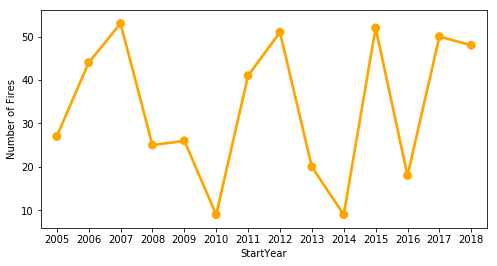

In [21]:
plt.figure(figsize=(8,4))
sns.pointplot(x=fire_year.index,y='Number of Fires',data=fire_year,color='orange'); #plots line chart of fires per year

**Findings:** This confirms the statement made on the introduction above that there are no specific trends in terms of the number of fires that happen year after year. The year that has the most fire occurrences is 2007 with 53 occurrences and 2015 comes close to second having 52 occurrences.

In [23]:
fire_season=fire_true.groupby(['Season']).size().to_frame('Number of Fires') #gets count of number of fires by season
fire_season.sort_values(by='Number of Fires',ascending=False,inplace=True)
fire_season

,Number of Fires
Season,
Summer,361
Spring,69
Fall,34
Winter,9


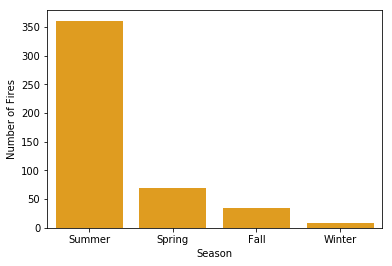

In [27]:
sns.barplot(x=fire_season.index,y='Number of Fires',data=fire_season,color='orange'); #plots bar chart of fires per season

**Findings:** This bar chart shows that most of the fires occur during the summer season and goes down during the winter which is kind of what we are expecting. This shows that as it gets colder, the number of fires become less.

In [28]:
fire_month=fire_true.groupby(['StartMonth']).size().to_frame('Number of Fires') #gets count of number of fires by month
fire_month

,Number of Fires
StartMonth,
April,27
August,105
December,2
February,4
January,3
July,139
June,117
March,13
May,29


In [29]:
fire_month.index = pd.CategoricalIndex(fire_month.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True) #assigns months as categorical indices to be able to use it to sort the bar chart by month
fire_month = fire_month.sort_index()
fire_month

,Number of Fires
StartMonth,
January,3
February,4
March,13
April,27
May,29
June,117
July,139
August,105
September,24


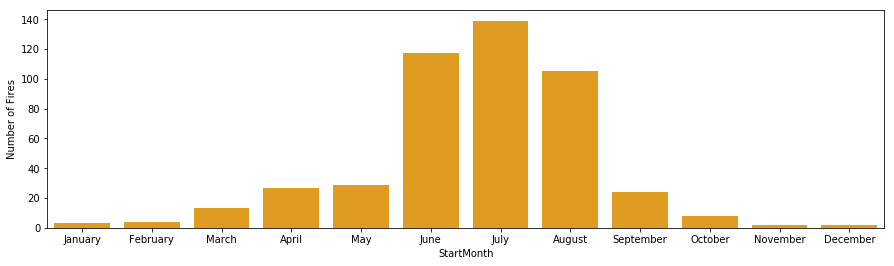

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(x=fire_month.index,y='Number of Fires',data=fire_month,color='orange'); #plots bar chart of fires per month

**Findings:** This shows that the highest occurrence of fires happen during the month of July. June comes in second and August is the third. This is somehow expected since summer starts towards the end of June so the hottest days will most likely fall during the month of July.

**B. Trend Based on Average Size of Fires**

In [41]:
fire_sy=fire_true.groupby(['StartYear']).mean()['Size'].to_frame('Average Size') #gets average size of burned area by year
fire_sy

,Average Size
StartYear,
2005,108732.074074
2006,104561.022727
2007,106679.962264
2008,82734.600000
2009,151740.500000
2010,108266.444444
2011,106194.609756
2012,112223.078431
2013,98343.800000


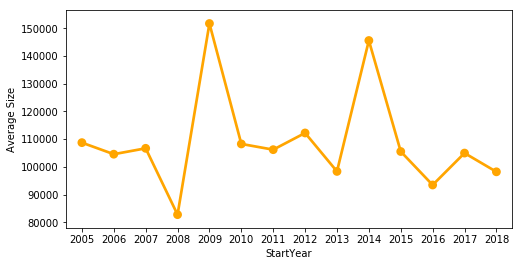

In [44]:
plt.figure(figsize=(8,4))
sns.pointplot(x=fire_sy.index,y='Average Size',data=fire_sy,color='orange'); #plots line chart of average size of burned area per year

**Findings:** Although the highest number of occurrences of fire happened in 2007 and 2015, 2009 has the highest average size of area burned (151,740 acres) while 2014 comes close to second (145,602 acres).

In [45]:
fire_ss=fire_true.groupby(['Season']).mean()['Size'].to_frame('Average Size') #gets average size of area burned by season
fire_ss.sort_values(by='Average Size',ascending=False,inplace=True)
fire_ss

,Average Size
Season,
Spring,139333.840580
Summer,103874.379501
Winter,99440.222222
Fall,78136.558824


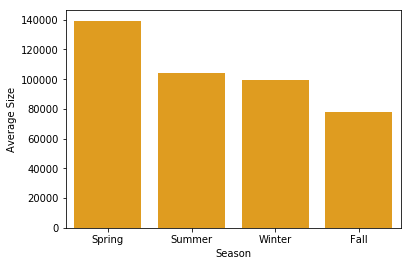

In [47]:
sns.barplot(x=fire_ss.index,y='Average Size',data=fire_ss,color='orange'); #plots bar chart of average size of area burned by season

**Findings:** Again, even though summer has the highest occurrence of fire, spring has the highest average size of area burned at 139,333 acres while summer is only second at 103,874 acres. Suprisingly also, winter comes in third at an average size of 99,440 acres burned.

In [48]:
fire_sm=fire_true.groupby(['StartMonth']).mean()['Size'].to_frame('Average Size') #gets average size of area burned by month
fire_sm

,Average Size
StartMonth,
April,120621.481481
August,91878.257143
December,162011.500000
February,92263.250000
January,67295.333333
July,113399.690647
June,103323.735043
March,229117.000000
May,116508.068966


In [49]:
fire_sm.index = pd.CategoricalIndex(fire_sm.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True) #assigns months as categorical indices to be able to use it to sort the bar chart by month
fire_sm = fire_sm.sort_index()
fire_sm

,Average Size
StartMonth,
January,67295.333333
February,92263.250000
March,229117.000000
April,120621.481481
May,116508.068966
June,103323.735043
July,113399.690647
August,91878.257143
September,73592.208333


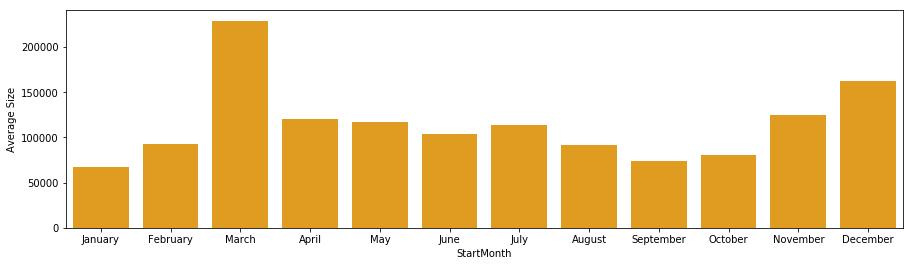

In [50]:
plt.figure(figsize=(15,4))
sns.barplot(x=fire_sm.index,y='Average Size',data=fire_sm,color='orange'); #plots bar chart of fires per year

**Findings:** Since spring has the highest average size in terms of area burned, it seems logical that a month under this season, in this case March, will have the highest average size of area burned. December comes in second as having the highest average size of are burned per month.

#### Part 2: California Wildfire with Weather Dataset ####
**A. Trend Based on Number of Fires**
1. Get descriptive statistics of numerical columns.
2. Create charts of trend in number of fires per year, month, and season.

In [31]:
CA_all.describe()

,Size,Costs,Days,temperature,humidity,precipIntensity,windSpeed
count,61.000000,5.400000e+01,61,61.000000,61.000000,61.000000,61.000000
mean,105508.213115,6.870516e+07,45 days 19:16:43.278688,80.452623,0.273607,0.000044,3.094590
std,77346.686301,5.248740e+07,38 days 05:36:44.681333,10.621380,0.152633,0.000346,2.525854
min,40200.000000,3.700000e+06,1 days 00:00:00,51.090000,0.110000,0.000000,0.280000
25%,58871.000000,3.300909e+07,18 days 00:00:00,71.700000,0.170000,0.000000,1.400000
50%,78698.000000,5.632920e+07,35 days 00:00:00,81.600000,0.240000,0.000000,2.430000
75%,110720.000000,9.361926e+07,68 days 00:00:00,89.870000,0.330000,0.000000,3.780000
max,459123.000000,2.625000e+08,164 days 00:00:00,96.630000,1.000000,0.002700,11.250000


**Findings:** 

*Size:* In terms of the size of the burned area, the mean is about 105,508 acres which is quite close to the overall mean value of 107,113 acres. The median is also less than the mean at 78,698 therefore distribution is also skewed to the right. Since significant fires are considered to be those equal to have area burned size of 40,000 or greater, it is just expected that the minimum value is equal or slightly above this value, which, in this case is equal to 40,000 acres. In this case, it is equal to 40,200 acres. The maximum value is at 459,123 acres.

*Costs:* With respect to the costs incurred for the fire, the mean is about \\$68M. This is a lot more than the overall mean which was at \\$19M. The distribution of the cost is also skewed to the right due to the fact that the median (\\$56M) is less than the mean.

*Days:* The length of days between start of the fire and when it was contained has a mean value of 45 days which is also higher than the overall mean at 43 days. Again, this variable's distribution is also skewed to the right since median at 35 days is less than the mean. In addition, the maximum length of days that a fire was mitigated is 164 days which is almost 6 months.

*Temperature:* The mean temperature on the day that the fire occurred is at 80 degrees fahrenheit. The median is very close to the mean at 81.6. This can mean that the temperature is almost normally distributed. It is also interesting to note that the maximum temperature that a fire occurred is at 96 degrees fahrenheit.

*Humidity:* The mean humidity on the day the fire occurred is about 27\% while median is at 24\%. The distribution is slightly skewed to the right.

*Precipitation:* Looking at the observations, there was only one with value more than zero. For this reason, the researchers will not use this column for now for further analysis since it may not provide additional information.

*Wind Speed:* With regards to wind speed, the mean wind speed the day the fire occurred is at 3.09mph while median is at 2.43mph. Again, this gives us information that the wind speed data is skewed to the right.

In [32]:
CA_year=CA_all.groupby(['StartYear']).size().to_frame('Number of Fires') #gets count of number of fires by year
CA_year

,Number of Fires
StartYear,
2005,1
2006,3
2007,7
2008,12
2009,2
2012,5
2013,1
2014,3
2015,5


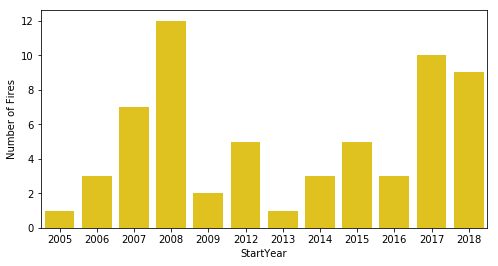

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(x=CA_year.index,y='Number of Fires',data=CA_year,color='gold'); #plots bar chart of fires per year

**Findings:** Although there is really no overall trend with respect to the number of fire occurrences per year in California, it is still noticeable that since 2008, the number of fire occurrences somehow decreased. The highest occurrence happened in 2008 at 12 while 2017 comes close at 2017.

In [34]:
CA_season= CA_all.groupby(['Season']).size().to_frame('Number of Fires') #gets count of number of fires by season
CA_season.sort_values(by='Number of Fires',ascending=False,inplace=True)
CA_season

,Number of Fires
Season,
Summer,44
Fall,16
Winter,1


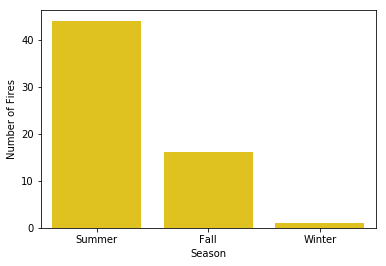

In [35]:
sns.barplot(x=CA_season.index,y='Number of Fires',data=CA_season,color='gold'); #plots bar chart of fires per season

**Findings:** Like the overall distribution of fire occurrences per season, it is not surprising that Summer season has the highest occurrence of fire. It is quite surprising however that there were no fire occurrence that happened during the Spring season and that there were still a moderate amount of fire that occurred during the Fall season in California.

In [36]:
CA_month=CA_all.groupby(['StartMonth']).size().to_frame('Number of Fires') #gets count of number of fires by month
CA_month

,Number of Fires
StartMonth,
August,14
December,1
July,16
June,14
November,2
October,7
September,7


In [37]:
CA_month.index = pd.CategoricalIndex(CA_month.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True) #assigns months as categorical indices to be able to use it to sort the bar chart by month
CA_month = CA_month.sort_index()
CA_month

,Number of Fires
StartMonth,
June,14
July,16
August,14
September,7
October,7
November,2
December,1


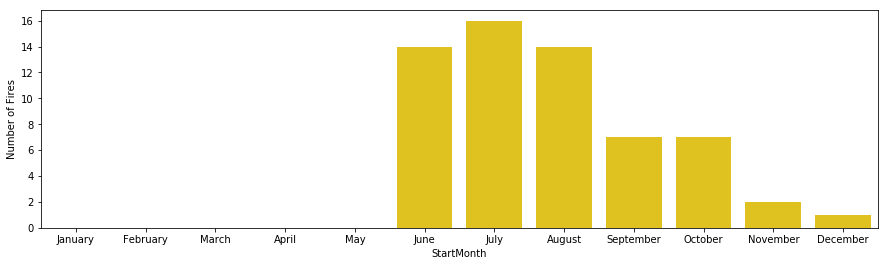

In [38]:
plt.figure(figsize=(15,4))
sns.barplot(x=CA_month.index,y='Number of Fires',data=CA_month,color='gold');

**Findings:** Same as the overall US wildfires, the highest occurrence of fires for California happened during the month of July. June comes in second and August is the third. This is somehow expected since summer starts towards the end of June so the hottest days will most likely fall during the month of July.

**B. Trend Based on Average Size of Fires**

In [52]:
CA_sy=CA_all.groupby(['StartYear']).mean()['Size'].to_frame('Average Size') #gets average size of area burned by year
CA_sy

,Average Size
StartYear,
2005,70736.000000
2006,88200.666667
2007,107029.285714
2008,92016.250000
2009,125033.000000
2012,108108.600000
2013,257314.000000
2014,93938.333333
2015,89015.400000


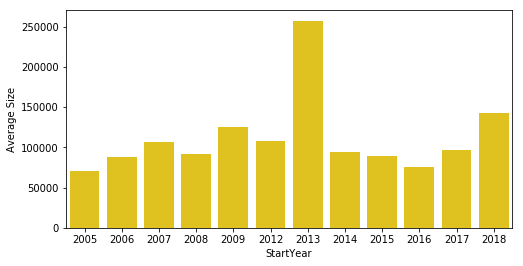

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(x=CA_sy.index,y='Average Size',data=CA_sy,color='gold'); #plots bar chart of average size of area burned per year

**Findings:** Even though 2008 has the highest number of occurrences of fire in California, the average size of burned area for that year was not that high at 70,000+ acres. However, 2013 has the highest average size of burned area across all years at 257,314 acres.

In [54]:
CA_ss= CA_all.groupby(['Season']).mean()['Size'].to_frame('Average Size') #gets average size of area burned by season
CA_ss.sort_values(by='Average Size',ascending=False,inplace=True)
CA_ss

,Average Size
Season,
Winter,270000.00
Summer,107579.75
Fall,89530.75


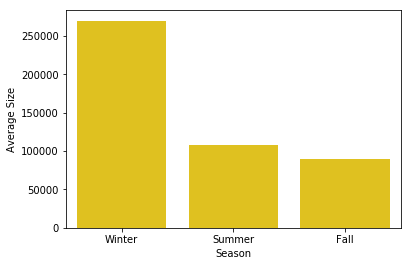

In [55]:
sns.barplot(x=CA_ss.index,y='Average Size',data=CA_ss,color='gold'); #plots bar chart of average size of area burned per season

**Findings:** The one occurrence of fire during the winter season in California burned 270,000 acres as compared with summer season that had an average of 107,579 acres.

In [56]:
CA_sm=CA_all.groupby(['StartMonth']).mean()['Size'].to_frame('Average Size') #gets average size of area burned by month
CA_sm

,Average Size
StartMonth,
August,105750.071429
December,270000.000000
July,125757.125000
June,88635.285714
November,125142.500000
October,85540.714286
September,83346.000000


In [57]:
CA_sm.index = pd.CategoricalIndex(CA_sm.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               ordered=True) #assigns months as categorical indices to be able to use it to sort the bar chart by month
CA_sm = CA_sm.sort_index()
CA_sm

,Average Size
StartMonth,
June,88635.285714
July,125757.125000
August,105750.071429
September,83346.000000
October,85540.714286
November,125142.500000
December,270000.000000


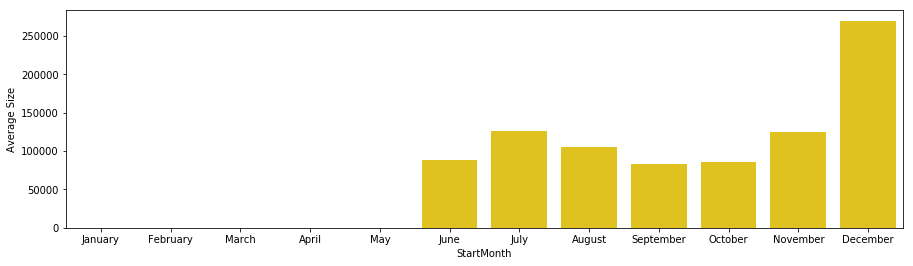

In [58]:
plt.figure(figsize=(15,4))
sns.barplot(x=CA_sm.index,y='Average Size',data=CA_sm,color='gold'); #plots bar chart of average size of area burned by month

**Findings:** The one occurrence of fire during the winter season in California burned 270,000 acres happened in December. For this chart, it shows that July (which is the month that has the highest occurrence of fire) has the second highest average size of burned area which is close to what is expected.

**C. Scatter Plots and Correlation Coefficient**

In [39]:
CA_all.corr()

,Size,Costs,temperature,humidity,precipIntensity,windSpeed
Size,1.000000,0.579016,0.003610,-0.055177,0.000499,0.032312
Costs,0.579016,1.000000,0.102199,0.093511,0.013921,-0.136498
temperature,0.003610,0.102199,1.000000,-0.492526,-0.359855,-0.203392
humidity,-0.055177,0.093511,-0.492526,1.000000,0.619495,-0.272717
precipIntensity,0.000499,0.013921,-0.359855,0.619495,1.000000,-0.145051
windSpeed,0.032312,-0.136498,-0.203392,-0.272717,-0.145051,1.000000


Text(0, 0.5, 'area burned')

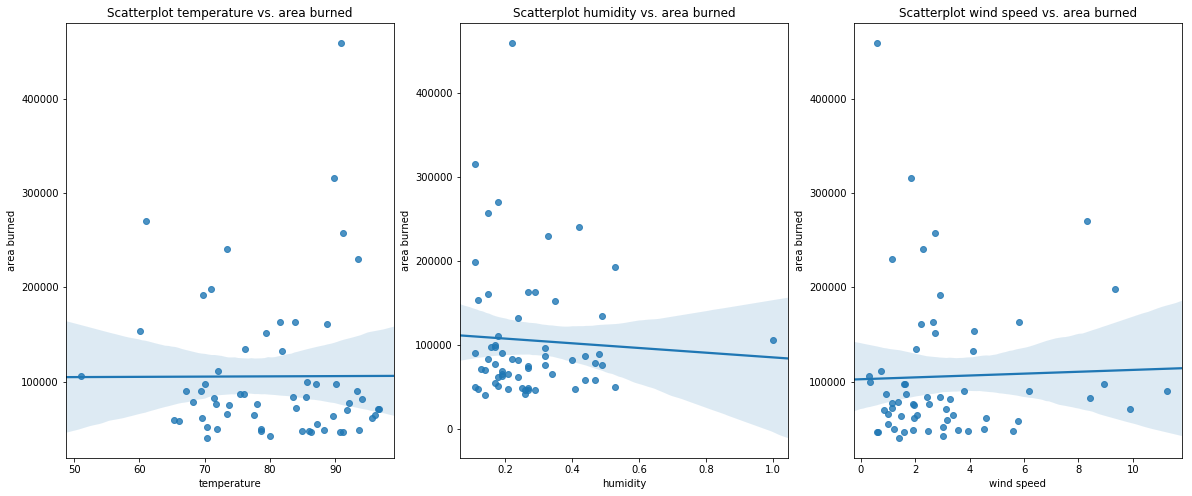

In [62]:
plt.figure(figsize=(20,8))

#plots temperature vs. area burned using seaborn
plt.subplot(131)
sns.regplot(x = 'temperature',y = 'Size', data = CA_all);
plt.title('Scatterplot temperature vs. area burned')
plt.xlabel('temperature')
plt.ylabel('area burned')

#plots humidity vs. area burned using seaborn
plt.subplot(132)
sns.regplot(x = 'humidity',y = 'Size', data = CA_all);
plt.title('Scatterplot humidity vs. area burned')
plt.xlabel('humidity')
plt.ylabel('area burned')

#plots wind speed vs. area burned using seaborn
plt.subplot(133)
sns.regplot(x='windSpeed', y='Size', data=CA_all)
plt.title('Scatterplot wind speed vs. area burned');
plt.xlabel('wind speed')
plt.ylabel('area burned')

**Findings:** Since we are going to predict the size of the area burned, we will be looking at the correlation coefficient for each independent variables such as temperature, humidity, and wind speed. Costs is excluded since cost is actually a function of the size of the area burned. Again, we are not going to use precipitation since only one record showed a value other than 0.

*Size vs. Temperature:* The correlation coefficient of Size vs. Temperature is at 0.003610. This means that temperature and size has no linear relationship which is confirmed by the scatter plot above.

*Size vs. Humidity:* The correlation coefficient of Size vs. Temperature is at -0.055177. This means that humidity and size has a very weak negative linear relationship to no linear relationship at all which is confirmed by the scatter plot above.

*Size vs. Wind Speed:* The correlation coefficient of Size vs. Temperature is at 0.032312. This means that wind speed and size has a very weak positive linear relationship to no linear relationship at all which is confirmed by the scatter plot above.

## Linear Regression Modeling: ##

In [64]:
CA_pm = CA_all[['Size','Cause','Days','Season','temperature','humidity','windSpeed']]
CA_pm.head()

,Size,Cause,Days,Season,temperature,humidity,windSpeed
0,48920.0,U,3 days,Summer,88.28,0.25,1.90
1,46150.0,H,36 days,Summer,91.10,0.27,0.59
2,459123.0,U,53 days,Summer,90.89,0.22,0.58
3,229651.0,U,38 days,Summer,93.51,0.33,1.15
4,153336.0,U,17 days,Fall,60.04,0.12,4.17


In [65]:
CA_dummies = pd.get_dummies(CA_pm)
CA_dummies.head()

,Size,Days,temperature,humidity,windSpeed,Cause_H,Cause_L,Cause_NR,Cause_U,Season_Fall,Season_Summer,Season_Winter
0,48920.0,3 days,88.28,0.25,1.90,0,0,0,1,0,1,0
1,46150.0,36 days,91.10,0.27,0.59,1,0,0,0,0,1,0
2,459123.0,53 days,90.89,0.22,0.58,0,0,0,1,0,1,0
3,229651.0,38 days,93.51,0.33,1.15,0,0,0,1,0,1,0
4,153336.0,17 days,60.04,0.12,4.17,0,0,0,1,1,0,0


In [75]:
import statsmodels.api as sm

X=CA_dummies[['temperature','windSpeed','humidity','Cause_H','Cause_L','Cause_U','Cause_NR','Season_Winter','Season_Summer','Season_Fall']]
Y=CA_dummies['Size']

X=sm.add_constant(X)

model_1 = sm.OLS(Y,X).fit()
predictions = model_1.predict(X)

print_model = model_1.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                   Size   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.8253
Date:                Sun, 05 May 2019   Prob (F-statistic):              0.584
Time:                        20:05:27   Log-Likelihood:                -769.02
No. Observations:                  61   AIC:                             1556.
Df Residuals:                      52   BIC:                             1575.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.025e+05   8.22e+04      1.246

**Findings:** Based on the result, we have a 0.113 R square, but it does not necessarily mean our model is not a good fit. We still believe "Temperature" "Windspeend" "Humidity" and "Season" can be used to model or predict the size of the area burned however, more statistical tests and maybe some transformation of the data will be required.

## Conclusion and Recommendation: ##

1.Since we couldn't predict the fire trend based on our analysis, but we did get the insights about which season had the highest fires (summer), so our recommendation is to add more fire protection during summer such as hire more employees during summer season. <br>
2.After analyzing the size of fires, we concluded spring season has highest fire size, so we recommend to allocate most easy fire area based on another history fire map analysis to separate these area by building some fire protection wall. <br>
3.After analyzing the California fire data, we recommend to apply the same concept to other states to figure out which season has the highest fire.

## References: ##

[link] https://www.iii.org/fact-statistic/facts-statistics-wildfires <br>
[link] http://time.com/collection/life-reinvented/5497251/wildfires-artificial-intelligence/